In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

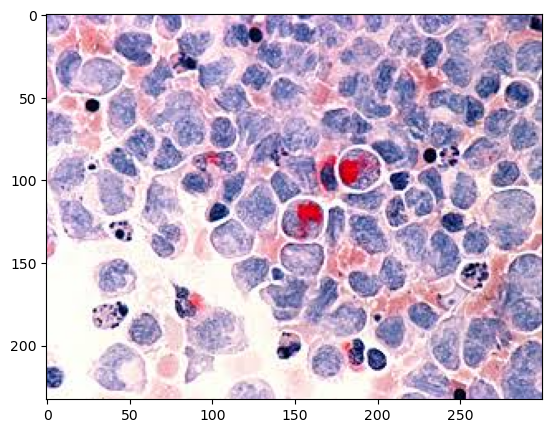

In [7]:
plt.rcParams['figure.figsize'] = [10, 5]
# imagen trabajada
img_cancerbgr = cv2.imread('..//img/cancer.jpg') 
img_cancerrgb = plt.imread('..//img/cancer.jpg')

img = cv2.cvtColor(img_cancerbgr, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()



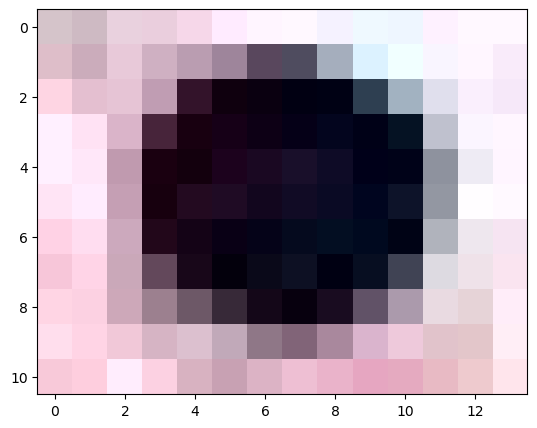

In [21]:
plt.imshow(img[50:61, 21:35, :])
plt.show()

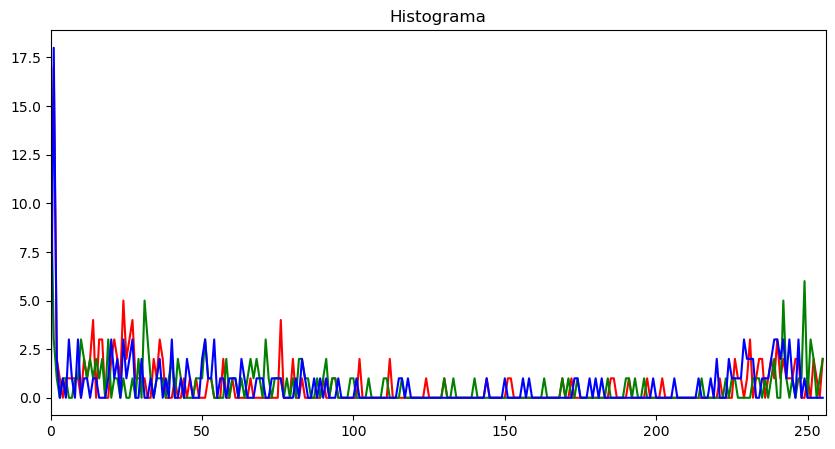

In [57]:
celulaCancer = img[50:61, 21:35, :]
plt.imsave('..//img/celulaCancer.jpg', celulaCancer)
celula = plt.imread('..//img/celulaCancer.jpg')
color = ('r', 'g', 'b')
for canal, col in enumerate(color):
    histograma = cv2.calcHist([celula * 255], [canal], None, [256], [0, 256])
    plt.plot(histograma, color = col)
    plt.xlim(0, 256)
plt.title('Histograma')
plt.show()

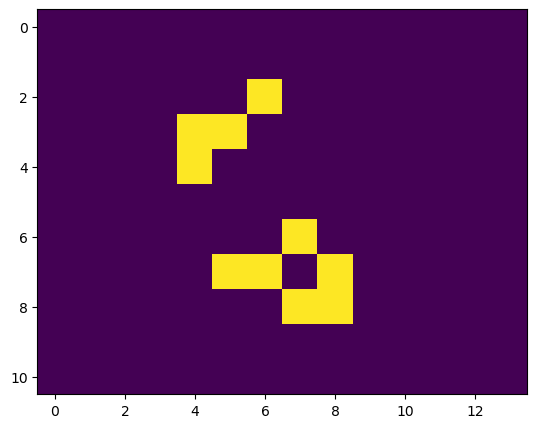

In [58]:
r_celula = celula[:,:,0] * 255
g_celula = celula[:,:,1] + 255
b_celula = celula[:,:,2] * 255

r_celula = r_celula > 200
g_celula = g_celula > 200
b_celula = b_celula > 200
# umbralizacion de manera manual
imgFin = np.array(r_celula * g_celula * b_celula * 255, dtype= int)
plt.imshow(imgFin)
plt.show()

In [1]:
def  solarizar(img, umbral):
    img_solarizada = np.where(img<umbral, img, 255 - img)
    return img_solarizada